# Overplot of AIA and FOXSI2

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
import astropy.units as u
from sunpy.time import parse_time
from matplotlib.patches import Rectangle
import numpy as np

## AIA-171

In [3]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})
    
these_files = file_list['171'][49:90]

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)

In [16]:
these_files = file_list['171'][57:62]
maps = []
for f in these_files:
    maps.append(Map(f))
cubed = MapCubed(maps)
x_range = u.Quantity([-600, 600], 'arcsec')
y_range = u.Quantity([-850, 400], 'arcsec')
scubed = cubed.submap(x_range, y_range)
sscubed171 = scubed.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]))

[ 0.  0.] pix


In [17]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d6.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda

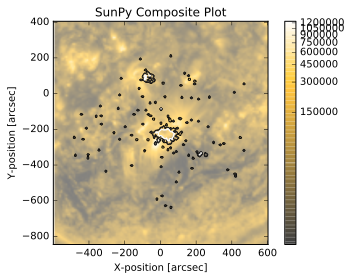

In [38]:
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,7,8],percent=True)
FOX171.set_alpha(0,alpha=0.5)
#FOX171.set_plot_settings()
FOX171.plot()
plt.colorbar()

In [ ]:
    >>> import sunpy.map
    >>> import sunpy.data
    >>> sunpy.data.download_sample_data(overwrite=False)   # doctest: +SKIP
    >>> import sunpy.data.sample
    >>> comp_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE,
    ...                          sunpy.data.sample.EIT_195_IMAGE,
    ...                          composite=True)
    >>> comp_map.add_map(sunpy.map.Map(sunpy.data.sample.RHESSI_IMAGE))
    >>> comp_map.peek()   # doctest: +SKIP

Unpacking: aia.lev1.193A_2013-09-21T16_00_06.84Z.image_lev1.fits
